In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras.optimizers import *
import os
import time
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
tf.__version__

'2.13.0'

In [4]:
print(os.getcwd())

C:\Users\shash\OneDrive\Desktop\BTP


In [5]:
base_data_path = 'mnist_base.csv'
mems_output_path = 'mems_output.csv'
base_data = pd.read_csv(base_data_path).to_numpy()
mems_output = pd.read_csv(mems_output_path, index_col = None, header = None).to_numpy()

In [6]:
base_shape = (28,28)
pp_shape = (20,22)
base_num_examples = base_data.shape[0]
num_examples = 70000

base_data_labels = base_data[:, 0]
data_labels = base_data_labels[:num_examples]
base_data = base_data[:, 1:]

print("Original training data: " + str(base_data.shape))
print(base_data)
print("Training labels: " + str(data_labels.shape))
print(data_labels)
print("MEMS Output: " + str(mems_output.shape))
print(mems_output)

Original training data: (70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Training labels: (70000,)
[1 0 1 ... 3 9 2]
MEMS Output: (70000, 2200)
[[0.00000000e+00 4.12714161e-10 2.63179900e-09 ... 3.23629521e-07
  3.10974657e-07 2.99254851e-07]
 [0.00000000e+00 4.12714161e-10 2.63179900e-09 ... 5.30979897e-07
  5.09742827e-07 4.87519248e-07]
 [0.00000000e+00 4.12714161e-10 2.63179900e-09 ... 4.19800516e-07
  4.06508299e-07 3.93451449e-07]
 ...
 [0.00000000e+00 4.12714160e-10 2.63215149e-09 ... 4.63134446e-07
  4.61107344e-07 4.58720224e-07]
 [0.00000000e+00 4.12714160e-10 2.63215149e-09 ... 4.09085037e-07
  4.16127007e-07 4.23287179e-07]
 [0.00000000e+00 4.12714160e-10 2.63215149e-09 ... 5.55910512e-07
  5.60064341e-07 5.62387647e-07]]


In [7]:
mems_normalized = preprocessing.normalize(mems_output)
print(mems_normalized)

[[0.00000000e+00 2.10763535e-05 1.34399862e-04 ... 1.65270079e-02
  1.58807534e-02 1.52822502e-02]
 [0.00000000e+00 1.98286356e-05 1.26443404e-04 ... 2.55106510e-02
  2.44903271e-02 2.34226069e-02]
 [0.00000000e+00 2.06698690e-05 1.31807788e-04 ... 2.10247733e-02
  2.03590623e-02 1.97051391e-02]
 ...
 [0.00000000e+00 2.05779248e-05 1.31239052e-04 ... 2.30918798e-02
  2.29908085e-02 2.28717867e-02]
 [0.00000000e+00 2.07842337e-05 1.32554821e-04 ... 2.06014715e-02
  2.09561042e-02 2.13166895e-02]
 [0.00000000e+00 2.09043052e-05 1.33320596e-04 ... 2.81573159e-02
  2.83677108e-02 2.84853881e-02]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(mems_normalized, data_labels, test_size = 0.2, shuffle = True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)
# print(X_val)
# print(y_val)

In [68]:
model = keras.Sequential([
    layers.Input(shape = (None, 2200)),
    layers.Dense(10, activation = 'softmax')
])

best_accuracy = 0.0
best_lr = 0.0
best_batch_size = 0
best_epochs = 0

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
max_epochs = 200  # You can adjust this value based on your requirements

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = keras.Sequential([
            layers.Input(shape = (None, 2200)),
            layers.Dense(10, activation = 'softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        start = time.time()
        history = model.fit(X_train, y_train, epochs=max_epochs, validation_data=(X_val, y_val),
                            verbose=0, batch_size=batch_size)
        
        elapsed_time = time.time() - start
        accuracy = history.history['val_accuracy'][-1]  # Get the final validation accuracy
        
        print(f"Learning Rate: {lr}, Batch Size: {batch_size}, Epochs: {max_epochs}")
        print("Validation Accuracy:", accuracy)
        print("Validation Loss:", history.history['val_loss'][-1])
        
        print("Total time:", elapsed_time, "seconds\n")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_batch_size = batch_size
            best_epochs = max_epochs

print("Best Learning Rate:", best_lr)
print("Best Batch Size:", best_batch_size)
print("Best Epochs:", best_epochs)



Learning Rate: 0.001, Batch Size: 32, Epochs: 200
Validation Accuracy: 0.8550476431846619
Validation Loss: 0.4853972792625427
Total time: 425.4440402984619 seconds

Learning Rate: 0.001, Batch Size: 64, Epochs: 200
Validation Accuracy: 0.8512380719184875
Validation Loss: 0.4990934729576111
Total time: 226.62731647491455 seconds

Learning Rate: 0.001, Batch Size: 128, Epochs: 200
Validation Accuracy: 0.8478095531463623
Validation Loss: 0.5209876894950867
Total time: 171.04204964637756 seconds

Learning Rate: 0.01, Batch Size: 32, Epochs: 200
Validation Accuracy: 0.8666666746139526
Validation Loss: 0.4543847143650055
Total time: 388.5856740474701 seconds

Learning Rate: 0.01, Batch Size: 64, Epochs: 200
Validation Accuracy: 0.8645714521408081
Validation Loss: 0.46949413418769836
Total time: 218.5093114376068 seconds

Learning Rate: 0.01, Batch Size: 128, Epochs: 200
Validation Accuracy: 0.8666666746139526
Validation Loss: 0.46024131774902344
Total time: 167.22907972335815 seconds

Learni

In [11]:
model = keras.Sequential([
    layers.Input(shape = (None, 2200)),
    layers.Dense(10, activation = 'softmax')
])


In [12]:

# sgd_optimizer = SGD(learning_rate = 1)
# model.compile(optimizer = sgd_optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_data = (X_val, y_val), shuffle = True)
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_data = (X_val, y_val), shuffle = True, verbose = 1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/500
1750/1750 [==============================] - 2s 1ms/step - loss: 1.2954 - accuracy: 0.6163 - val_loss: 0.9639 - val_accuracy: 0.7344
Epoch 2/500
1750/1750 [==============================] - 2s 1ms/step - loss: 0.8428 - accuracy: 0.7602 - val_loss: 0.7655 - val_accuracy: 0.7836
Epoch 3/500
1750/1750 [==============================] - 2s 921us/step - loss: 0.7199 - accuracy: 0.7900 - val_loss: 0.6778 - val_accuracy: 0.8047
Epoch 4/500
1750/1750 [==============================] - 2s 973us/step - loss: 0.6617 - accuracy: 0.8037 - val_loss: 0.6323 - val_accuracy: 0.8123
Epoch 5/500
1750/1750 [==============================] - 2s 947us/step - loss: 0.6222 - accuracy: 0.8161 - val_loss: 0.6153 - val_accuracy: 0.8171
Epoch 6/500
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5981 - accuracy: 0.8221 - val_loss: 0.5876 - val_accuracy: 0.8276
Epoch 7/500
1750/1750 [==============================] - 2s 998us/step - loss: 0.5777 - accuracy: 0.8284 - val_loss: 0.5747 

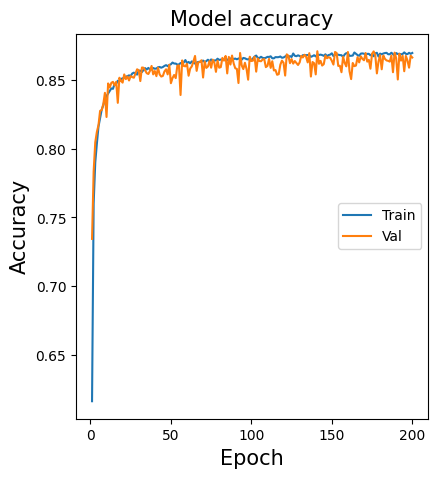

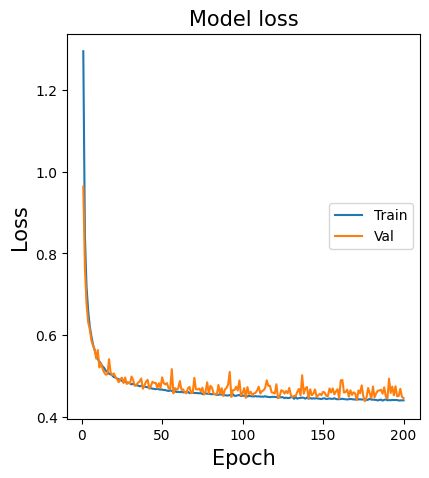

In [13]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.figure(figsize=(10,5),dpi=100)
  plt.subplot(1, 2, 1) # index 2
  plt.plot(epoch_range, history.history['accuracy'][:epochs])
  plt.plot(epoch_range, history.history['val_accuracy'][:epochs])
  plt.title('Model accuracy',fontsize=15)
  plt.ylabel('Accuracy',fontsize=15)
  plt.xlabel('Epoch',fontsize=15)
  plt.legend(['Train', 'Val'], loc='center right')
  plt.show()
  # Plot training & validation loss values
  plt.figure(figsize=(10,5),dpi=100)
  plt.subplot(1, 2, 2) # index 2
  plt.plot(epoch_range, history.history['loss'][:epochs])
  plt.plot(epoch_range, history.history['val_loss'][:epochs])
  plt.title('Model loss',fontsize=15)
  plt.ylabel('Loss',fontsize=15)
  plt.xlabel('Epoch',fontsize=15)
  plt.legend(['Train', 'Val'], loc='center right')
  plt.show()
plot_learningCurve(history,200)

In [20]:
pd.DataFrame(history.history['val_loss']).to_csv('val_loss.csv', header = None)

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 1.0186 - accuracy: 0.7383


219/219 [==============================] - 0s 662us/step


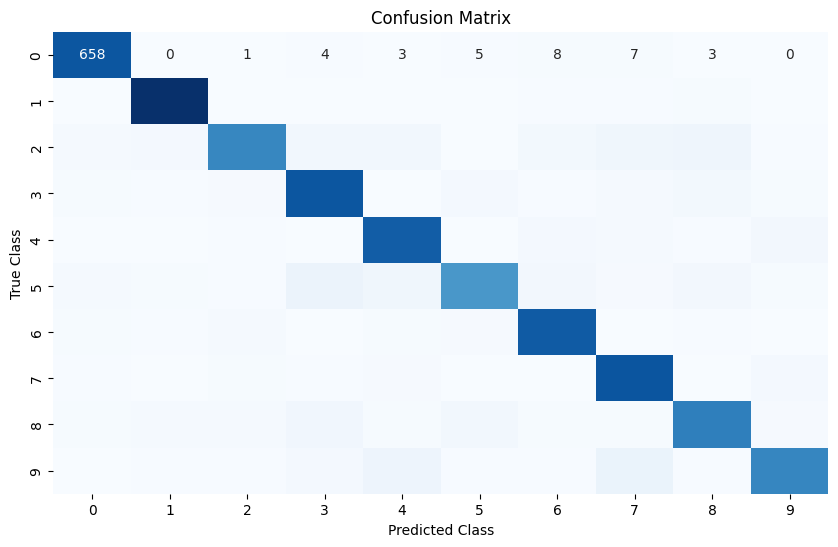

In [14]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.xticks(np.arange(0.5, 10.5), [str(i) for i in range(10)])
plt.yticks(np.arange(0.5, 10.5), [str(i) for i in range(10)])
plt.show()

In [15]:
class_accuracies = []
for i in range(cm.shape[0]):
    class_accuracy = cm[i, i] / np.sum(cm[i, :])
    print(f"Accuracy for class {i}: {class_accuracy:.3f}")
    class_accuracies.append(class_accuracy)

Accuracy for class 0: 0.955
Accuracy for class 1: 0.970
Accuracy for class 2: 0.743
Accuracy for class 3: 0.880
Accuracy for class 4: 0.897
Accuracy for class 5: 0.732
Accuracy for class 6: 0.928
Accuracy for class 7: 0.925
Accuracy for class 8: 0.806
Accuracy for class 9: 0.793


In [22]:
cmd = ConfusionMatrixDisplay(cm, text_ = None)
cmd.plot()

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'text_'

In [38]:
model = keras.models.load_model('MNIST_model_87acc.keras')

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
class_labels = ['0','1','2','3','4','5','6','7','8','9']
cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)

# Set up a more visually appealing color palette
color_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, fmt=".3f", cmap=color_palette, cbar=True, annot_kws={'size': 0}, square = True)
plt.title('Confusion Matrix\nAccuracy: 87.2%'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.rc('axes', labelsize = 10)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'np' is not defined